In [2]:
# uncomment if not installed
# pip install pyNetLogo

  Using cached pyNetLogo-0.4.2.tar.gz (58 kB)
  Created wheel for pyNetLogo: filename=pyNetLogo-0.4.2-py3-none-any.whl size=64604 sha256=183a8b320155885b9736f418ce354d24090efe78d415f46787d80f057e8fe022
  Stored in directory: c:\users\archipel-03\appdata\local\pip\cache\wheels\fa\5c\68\702aa26a9d2fbd249fe9c4c9d4d333e2baada598c3628e11fb
Successfully built pyNetLogo
Note: you may need to restart the kernel to use updated packages.


In [5]:
# uncomment if not installed
#pip install jpype1

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from ema_workbench import (Model, RealParameter, TimeSeriesOutcome, 
                           Constant, CategoricalParameter, 
                           IntegerParameter, perform_experiments, 
                           MultiprocessingEvaluator, ema_logging)

from ema_workbench.connectors.netlogo import NetLogoModel
from ema_workbench.connectors.excel import ExcelModel

from ema_workbench.em_framework.evaluators import LHS, SOBOL, MORRIS

from ema_workbench.analysis import (plotting, plotting_util)

C:\Users\archipel-03\anaconda3\lib\site-packages\ema_workbench\connectors\__init__.py:17: ImportWarning: vensim connector not available
  warnings.warn("vensim connector not available", ImportWarning)


#### All input parameters and input possibilities

* EMA/pyNetLogo passes the string value as a raw text into NetLogo, as opposed to as a string. Single '' around the string solve the issue

|Parameter	|Range or value	| Parameter class |
|-----------|--------------|-----------------:|
|Final time	    |1565	    | run_length|
|GDP    	|1 – 10	| IntegerParameter|
|rainfall   |1 – 10 	| IntegerParameter|
|water_demand     	|1 – 10	    |IntegerParameter |
|regulations	    |1 – 10	    | IntegerParameter|
|trust_agriculture	    |1 – 10	    | IntegerParameter|
|trust_government    |1 – 10	    | IntegerParameter|
|knowledge_dev	    |1 – 10	    | IntegerParameter|
|GDP_change    |'"decreasing"', '"constant"', '"increasing"'	    | CategoricalParameter|
|w_demand_change	    |'"decreasing"', '"constant"', '"increasing"'	    |CategoricalParameter |
|regulations_change	    |'"decreasing"', '"constant"', '"increasing"'	    |CategoricalParameter |
|trust_agri_change	    |'"decreasing"', '"constant"', '"increasing"'    |CategoricalParameter |
|trust_gov_change	    |'"decreasing"', '"constant"', '"increasing"'	    |CategoricalParameter |
|know_dev_change	    |'"decreasing"', '"constant"', '"increasing"'	    |CategoricalParameter |
|GDP_change_r	    |'"gradual"', '"medium"', '"abrupt"'	    |CategoricalParameter |
|rainfall_change_r	    |'"gradual"', '"medium"', '"abrupt"'	    |CategoricalParameter |
|w_demand_change_r	    |'"gradual"', '"medium"', '"abrupt"'	    |CategoricalParameter |
|regulations_change_r	    |'"gradual"', '"medium"', '"abrupt"'	    |CategoricalParameter |
|trust_agri_change_r	    |'"gradual"', '"medium"', '"abrupt"'	    |CategoricalParameter |
|trust_gov_change_r	    |'"gradual"', '"medium"', '"abrupt"'	    |CategoricalParameter |
|know_dev_change_r	    |'"gradual"', '"medium"', '"abrupt"'	    |CategoricalParameter |
|No_consumers	    |4 - 100	    |IntegerParameter |
|No_farmers    |4 - 20	    |IntegerParameter |
|Leader_network_size	    |6 - 12	    |IntegerParameter |
|consumer_leaders    |0 - 0.25	    |RealParameter |
|farmer_leaders	    |0 - 0.25	    |RealParameter |
|leader_influence    |1 - 10	    |IntegerParameter |

#### Outcome parameters
|Outcomes	|Outcome class	
|-----------|--------------:|
|TIME	    |TimeSeriesOutcome	    |
|average_risk_consumers	    |TimeSeriesOutcome	    |
|average_benefit_consumers	    |TimeSeriesOutcome	    |
|average_risk_farmers	    |TimeSeriesOutcome	    |
|average_benefit_farmers	    |TimeSeriesOutcome	    |
|optimistic_consumers	    |TimeSeriesOutcome	    |
|conflicted_consumers	    |TimeSeriesOutcome	    |
|neutral_consumers	    |TimeSeriesOutcome	    |
|alarmed_consumers	    |TimeSeriesOutcome	    |
|optimistic_farmers	    |TimeSeriesOutcome	    |
|conflicted_farmers	    |TimeSeriesOutcome	    |
|neutral_farmers	    |TimeSeriesOutcome	    |
|alarmed_farmers	    |TimeSeriesOutcome	    |

In [2]:
ema_logging.log_to_stderr(ema_logging.INFO)

#We can define common uncertainties and outcomes for each model:
uncertainties = [IntegerParameter('GDP', 3, 7),
                 IntegerParameter('rainfall', 3, 7),
                 IntegerParameter('water_demand', 8, 10),
                 IntegerParameter('regulations', 5, 8)
                ] 

outcomes = [TimeSeriesOutcome('TIME'),
            TimeSeriesOutcome('average_risk_consumers'),
            TimeSeriesOutcome('average_benefit_consumers'), 
            TimeSeriesOutcome('average_risk_farmers'),
            TimeSeriesOutcome('average_benefit_farmers'),
            TimeSeriesOutcome('optimistic_consumers'),
            TimeSeriesOutcome('conflicted_consumers'),
            TimeSeriesOutcome('neutral_consumers'),
            TimeSeriesOutcome('alarmed_consumers'),
            TimeSeriesOutcome('optimistic_farmers'),
            TimeSeriesOutcome('conflicted_farmers'),
            TimeSeriesOutcome('neutral_farmers'),
            TimeSeriesOutcome('alarmed_farmers')
           ]

constants = [Constant('GDP_change', '"constant"'),
             Constant('rainfall_change', '"constant"'),
             Constant('w_demand_change', '"constant"'),
             Constant('regulations_change', '"constant"'),
             Constant('trust_agri_change', '"constant"'),
             Constant('trust_gov_change', '"constant"'),
             Constant('know_dev_change', '"constant"'),  
             Constant('trust_agriculture', 5),
             Constant('trust_government', 5),
             Constant('knowledge_dev', 5),
             Constant('No_consumers', 100),
             Constant('No_farmers', 20),
             Constant('consumer_leaders', 0.10),
             Constant('farmer_leaders', 0.10),
             Constant('leader_influence', 7)
            ]
             
           
        

#Define the NetLogo model
nl_model = NetLogoModel('NetLogo', wd='./Netlogo/', 
                        model_file="Risk_benefit_model_fullSetUp_bugs.nlogo")
nl_model.run_length = 1565
nl_model.replications = 5
nl_model.uncertainties = uncertainties
nl_model.outcomes = outcomes
nl_model.constants = constants

In [75]:
nr_experiments = 10

with MultiprocessingEvaluator(nl_model) as evaluator:
    results = evaluator.perform_experiments(nr_experiments, uncertainty_sampling=LHS)

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 10 scenarios * 1 policies * 1 model(s) = 10 experiments
[MainProcess/INFO] 1 cases completed
[MainProcess/INFO] 2 cases completed
[MainProcess/INFO] 3 cases completed
[MainProcess/INFO] 4 cases completed
[MainProcess/INFO] 5 cases completed
[MainProcess/INFO] 6 cases completed
[MainProcess/INFO] 7 cases completed
[MainProcess/INFO] 8 cases completed
[MainProcess/INFO] 9 cases completed
[MainProcess/INFO] 10 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [76]:
experiments, outcomes = results

In [3]:
nr_experiments = 10

#Using Latin Hypercube sampling
experiments, outcomes = perform_experiments(nl_model, nr_experiments, 
                                            uncertainty_sampling=LHS)

[MainProcess/INFO] performing 10 scenarios * 1 policies * 1 model(s) = 10 experiments
[MainProcess/INFO] performing experiments sequentially
[MainProcess/INFO] 1 cases completed
C:\Users\archipel-03\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
[MainProcess/INFO] 2 cases completed
[MainProcess/INFO] 3 cases completed
[MainProcess/INFO] 4 cases completed
[MainProcess/INFO] 5 cases completed
[MainProcess/INFO] 6 cases completed
[MainProcess/INFO] 7 cases completed
[MainProcess/INFO] 8 cases completed
[MainProcess/INFO] 9 cases completed
[MainProcess/INFO] 10 cases completed
[MainProcess/INFO] experiments finished


In [77]:
print(experiments.shape)
print(outcomes['average_benefit_farmers'].shape)


experiments

(10, 7)
(10, 5, 1566)


,GDP,rainfall,regulations,water_demand,scenario,policy,model
0,3.0,6.0,8.0,8.0,10,None,NetLogo
1,3.0,5.0,8.0,9.0,11,None,NetLogo
2,7.0,4.0,5.0,10.0,12,None,NetLogo
3,7.0,7.0,7.0,8.0,13,None,NetLogo
4,4.0,3.0,7.0,9.0,14,None,NetLogo
5,5.0,4.0,6.0,10.0,15,None,NetLogo
6,5.0,5.0,6.0,9.0,16,None,NetLogo
7,6.0,6.0,8.0,10.0,17,None,NetLogo
8,4.0,7.0,5.0,8.0,18,None,NetLogo
9,6.0,3.0,6.0,8.0,19,None,NetLogo


In [103]:
for k, v in outcomes.items():
    print(k, v.shape)

TIME (10, 5, 1566)
average_risk_consumers (10, 5, 1566)
average_benefit_consumers (10, 5, 1566)
average_risk_farmers (10, 5, 1566)
average_benefit_farmers (10, 5, 1566)
optimistic_consumers (10, 5, 1566)
conflicted_consumers (10, 5, 1566)
neutral_consumers (10, 5, 1566)
alarmed_consumers (10, 5, 1566)
optimistic_farmers (10, 5, 1566)
conflicted_farmers (10, 5, 1566)
neutral_farmers (10, 5, 1566)
alarmed_farmers (10, 5, 1566)


In [79]:
L  =[[1, 2, 6, 5],
     [4, 5, 3, 2],
     [7, 9, 8, 1],
     [1, 2, 1, 4]]

def column_median(lst):
      return [np.median(i) for i in zip(*lst)]
    
def column_max(lst):
      return [np.max(i) for i in zip(*lst)]
    
def column_min(lst):
      return [np.min(i) for i in zip(*lst)]

print(column_median(L))
print(column_max(L))
print(column_min(L))

[2.5, 3.5, 4.5, 3.0]
[7, 9, 8, 5]
[1, 2, 1, 1]


In [113]:
outcomes_test = outcomes.copy()

In [114]:
for j in outcomes_test:
    big_list = []
    for i in outcomes_test[j]:
        #print(i.T.shape)
        #print(column_median(i))
        median_array = np.asarray(column_median(i))
        big_list.append(median_array)
        outcomes_test[j] = np.asarray(big_list)

In [115]:
for k, v in outcomes_test.items():
    print(k, v.shape)

TIME (10, 1566)
average_risk_consumers (10, 1566)
average_benefit_consumers (10, 1566)
average_risk_farmers (10, 1566)
average_benefit_farmers (10, 1566)
optimistic_consumers (10, 1566)
conflicted_consumers (10, 1566)
neutral_consumers (10, 1566)
alarmed_consumers (10, 1566)
optimistic_farmers (10, 1566)
conflicted_farmers (10, 1566)
neutral_farmers (10, 1566)
alarmed_farmers (10, 1566)


In [97]:
outcomes_test['average_benefit_farmers'] = np.asarray(big_list)
outcomes_test['average_benefit_farmers'].shape

(10, 1566)

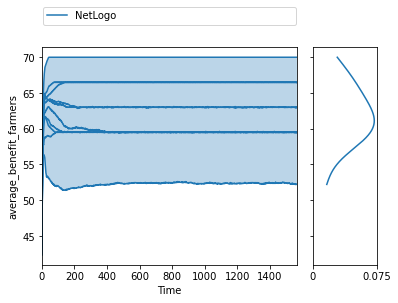

In [121]:
experiments_to_show = np.arange(0, experiments.shape[0], 1)

plotting.lines(experiments, outcomes_test, outcomes_to_show='average_benefit_farmers', group_by='model',
      show_envelope=True, density=plotting.Density.KDE, titles=None, 
      experiments_to_show=experiments_to_show)
plt.show()

In [67]:
outcomes['average_benefit_farmers']

(1566,)

In [187]:
alarmed_farmers_df = pd.DataFrame.from_dict({(i,j): outcomes_test["alarmed_farmers"][i][j] 
                               for i in outcomes_test["alarmed_farmers"].keys() 
                               for j in outcomes_test["alarmed_farmers"][i].keys()},
                               orient='index')
alarmed_farmers_df = alarmed_farmers_df.T
alarmed_farmers_df

,"(1, 1)","(1, 2)","(1, 3)","(1, 4)","(1, 5)","(2, 1)","(2, 2)","(2, 3)","(2, 4)","(2, 5)",...,"(9, 1)","(9, 2)","(9, 3)","(9, 4)","(9, 5)","(10, 1)","(10, 2)","(10, 3)","(10, 4)","(10, 5)"
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,3.0,2.0,1.0,1.0,0.0,1.0,2.0,2.0,0.0,0.0,...,2.0,0.0,1.0,1.0,1.0,1.0,2.0,0.0,1.0,0.0
2,3.0,2.0,1.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,...,3.0,0.0,0.0,2.0,1.0,1.0,2.0,0.0,2.0,0.0
3,1.0,2.0,1.0,1.0,2.0,0.0,4.0,1.0,2.0,0.0,...,3.0,1.0,0.0,2.0,1.0,1.0,2.0,1.0,3.0,0.0
4,1.0,2.0,0.0,2.0,3.0,0.0,3.0,1.0,3.0,0.0,...,2.0,2.0,0.0,1.0,1.0,2.0,4.0,1.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1561,16.0,17.0,2.0,16.0,12.0,4.0,15.0,16.0,18.0,0.0,...,4.0,20.0,0.0,19.0,0.0,19.0,19.0,18.0,0.0,0.0
1562,16.0,18.0,3.0,16.0,13.0,4.0,15.0,15.0,19.0,0.0,...,2.0,20.0,0.0,20.0,0.0,19.0,19.0,17.0,0.0,0.0
1563,16.0,17.0,3.0,15.0,10.0,4.0,14.0,16.0,19.0,0.0,...,2.0,20.0,0.0,20.0,0.0,19.0,19.0,19.0,0.0,0.0
1564,16.0,18.0,2.0,16.0,11.0,4.0,14.0,16.0,19.0,0.0,...,2.0,20.0,0.0,20.0,0.0,20.0,19.0,19.0,0.0,0.0


In [190]:
alarmed_farmers_dict = alarmed_farmers_df.to_dict()

<AxesSubplot:>

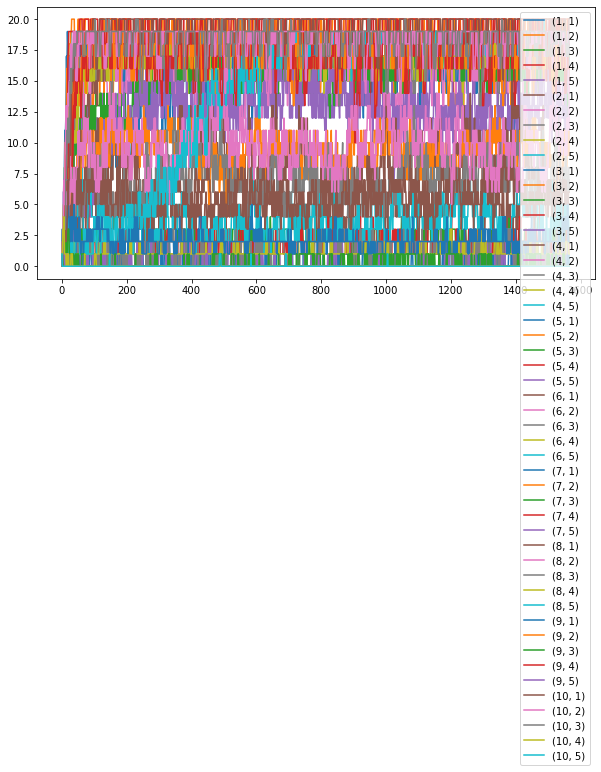

In [198]:
fig, ax = plt.subplots(1,figsize=(10,5))
alarmed_farmers_df.plot.line(ax=ax)

In [184]:
experiments_to_show = np.arange(0, experiments.shape[0], 1)

In [205]:
df = pd.DataFrame(dict([(f'{k}', pd.Series([a for b in v for a in b])) for k,v in outcomes_test.items()])).replace(np.nan, '')
df

,TIME,average_risk_consumers,average_benefit_consumers,average_risk_farmers,average_benefit_farmers,optimistic_consumers,conflicted_consumers,neutral_consumers,alarmed_consumers,optimistic_farmers,conflicted_farmers,neutral_farmers,alarmed_farmers
0,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[37.959090917053594, 38.29272866367322, 38.792...","[44.17568400392877, 44.511999104090926, 44.746...","[35.508227415108024, 35.523494380973275, 35.78...","[42.755561215409344, 43.01178978617686, 42.855...","[25.0, 26.0, 28.0, 24.0, 25.0, 27.0, 28.0, 26....","[24.0, 32.0, 31.0, 35.0, 33.0, 34.0, 38.0, 34....","[39.0, 36.0, 31.0, 30.0, 27.0, 23.0, 19.0, 22....","[12.0, 6.0, 10.0, 11.0, 15.0, 16.0, 15.0, 18.0...","[5.0, 4.0, 4.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, ...","[1.0, 2.0, 1.0, 2.0, 3.0, 1.0, 2.0, 1.0, 2.0, ...","[13.0, 11.0, 12.0, 14.0, 13.0, 14.0, 13.0, 13....","[1.0, 3.0, 3.0, 1.0, 1.0, 2.0, 2.0, 2.0, 3.0, ..."
1,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[38.084044448464, 38.80636778639985, 39.567097...","[44.61322628495142, 44.65750675287309, 44.7037...","[33.2491395098807, 34.1708038224829, 35.001908...","[44.84407933073572, 44.479256572585165, 44.333...","[25.0, 27.0, 22.0, 24.0, 17.0, 18.0, 17.0, 15....","[24.0, 35.0, 40.0, 43.0, 42.0, 43.0, 48.0, 52....","[39.0, 29.0, 30.0, 26.0, 29.0, 25.0, 23.0, 20....","[12.0, 9.0, 8.0, 7.0, 12.0, 14.0, 12.0, 13.0, ...","[5.0, 7.0, 7.0, 8.0, 5.0, 5.0, 5.0, 4.0, 5.0, ...","[1.0, 3.0, 3.0, 4.0, 4.0, 6.0, 5.0, 5.0, 7.0, ...","[13.0, 8.0, 8.0, 6.0, 9.0, 7.0, 7.0, 7.0, 4.0,...","[1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 4.0, 4.0, ..."
2,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[37.426508069562104, 38.10711693330855, 38.799...","[44.50240469450256, 44.69744729898458, 44.8553...","[32.37786421636871, 32.89594158644975, 33.3405...","[42.351802955059874, 42.95459606846656, 43.626...","[25.0, 25.0, 26.0, 23.0, 23.0, 23.0, 24.0, 25....","[24.0, 34.0, 42.0, 46.0, 52.0, 50.0, 56.0, 52....","[39.0, 35.0, 26.0, 23.0, 17.0, 19.0, 13.0, 14....","[12.0, 6.0, 6.0, 8.0, 8.0, 8.0, 7.0, 9.0, 13.0...","[5.0, 6.0, 5.0, 5.0, 6.0, 6.0, 5.0, 5.0, 6.0, ...","[1.0, 3.0, 3.0, 4.0, 6.0, 7.0, 7.0, 8.0, 8.0, ...","[13.0, 10.0, 11.0, 10.0, 8.0, 7.0, 8.0, 7.0, 5...","[1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, ..."
3,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[38.42301650682863, 38.080480298409356, 37.686...","[43.10783607663907, 43.81316059979386, 44.5163...","[30.63472396290618, 31.83719498925195, 32.9453...","[42.77546329763356, 42.638416661193446, 42.534...","[25.0, 26.0, 29.0, 26.0, 26.0, 27.0, 29.0, 30....","[24.0, 29.0, 29.0, 37.0, 38.0, 38.0, 41.0, 40....","[39.0, 38.0, 36.0, 31.0, 26.0, 23.0, 20.0, 19....","[12.0, 7.0, 6.0, 6.0, 10.0, 12.0, 10.0, 11.0, ...","[5.0, 4.0, 3.0, 3.0, 3.0, 4.0, 4.0, 3.0, 3.0, ...","[1.0, 2.0, 3.0, 3.0, 4.0, 2.0, 3.0, 5.0, 3.0, ...","[13.0, 13.0, 14.0, 13.0, 11.0, 11.0, 10.0, 9.0...","[1.0, 1.0, 0.0, 1.0, 2.0, 3.0, 3.0, 3.0, 3.0, ..."
4,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[38.31241900022088, 38.89938138244653, 39.4744...","[44.194272368435435, 44.35266846402545, 44.493...","[36.35059670341738, 36.21278894902555, 36.0235...","[43.03436476087268, 43.048131487714656, 43.136...","[25.0, 28.0, 28.0, 28.0, 26.0, 22.0, 20.0, 21....","[24.0, 41.0, 39.0, 37.0, 40.0, 43.0, 43.0, 45....","[39.0, 23.0, 24.0, 25.0, 23.0, 24.0, 25.0, 22....","[12.0, 8.0, 9.0, 10.0, 11.0, 11.0, 12.0, 12.0,...","[5.0, 6.0, 6.0, 8.0, 9.0, 8.0, 9.0, 6.0, 6.0, ...","[1.0, 4.0, 4.0, 2.0, 3.0, 1.0, 2.0, 1.0, 2.0, ...","[13.0, 10.0, 9.0, 8.0, 5.0, 8.0, 6.0, 10.0, 9....","[1.0, 0.0, 1.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, ..."
5,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[37.680260797349376, 37.20243643999358, 36.627...","[45.21566140506077, 45.93858635421276, 46.6556...","[32.60442400833661, 32.00200297775062, 31.5537...","[43.5370942299904, 43.46162390669772, 43.48301...","[25.0, 26.0, 31.0, 31.0, 30.0, 31.0, 32.0, 34....","[24.0, 31.0, 30.0, 37.0, 40.0, 38.0, 39.0, 41..

In [105]:
df.iloc[0]

ColTIME                         [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...
Colaverage_risk_consumers       [37.959090917053594, 38.29272866367322, 38.792...
Colaverage_benefit_consumers    [44.17568400392877, 44.511999104090926, 44.746...
Colaverage_risk_farmers         [35.508227415108024, 35.523494380973275, 35.78...
Colaverage_benefit_farmers      [42.755561215409344, 43.01178978617686, 42.855...
Coloptimistic_consumers         [25.0, 26.0, 28.0, 24.0, 25.0, 27.0, 28.0, 26....
Colconflicted_consumers         [24.0, 32.0, 31.0, 35.0, 33.0, 34.0, 38.0, 34....
Colneutral_consumers            [39.0, 36.0, 31.0, 30.0, 27.0, 23.0, 19.0, 22....
Colalarmed_consumers            [12.0, 6.0, 10.0, 11.0, 15.0, 16.0, 15.0, 18.0...
Coloptimistic_farmers           [5.0, 4.0, 4.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, ...
Colconflicted_farmers           [1.0, 2.0, 1.0, 2.0, 3.0, 1.0, 2.0, 1.0, 2.0, ...
Colneutral_farmers              [13.0, 11.0, 12.0, 14.0, 13.0, 14.0, 13.0, 13....
Colalarmed_farme

## Without multiple replications

In [50]:
#For the plotting.lines function, the outcomes need to be reshaped.

for i in outcomes_test.keys():
    outcomes_test[i]=outcomes_test[i][:,0,:]

In [51]:
outcomes_test

{'TIME': array([[0.000e+00, 1.000e+00, 2.000e+00, ..., 1.563e+03, 1.564e+03,
         1.565e+03],
        [0.000e+00, 1.000e+00, 2.000e+00, ..., 1.563e+03, 1.564e+03,
         1.565e+03],
        [0.000e+00, 1.000e+00, 2.000e+00, ..., 1.563e+03, 1.564e+03,
         1.565e+03],
        ...,
        [0.000e+00, 1.000e+00, 2.000e+00, ..., 1.563e+03, 1.564e+03,
         1.565e+03],
        [0.000e+00, 1.000e+00, 2.000e+00, ..., 1.563e+03, 1.564e+03,
         1.565e+03],
        [0.000e+00, 1.000e+00, 2.000e+00, ..., 1.563e+03, 1.564e+03,
         1.565e+03]]),
 'average_risk_consumers': array([[37.36240785, 37.67005347, 37.86175043, ..., 52.82358016,
         52.70289042, 52.74152514],
        [38.45186987, 37.64719034, 36.92331626, ..., 35.1544505 ,
         35.20744195, 35.16381546],
        [37.92623234, 37.45018165, 36.98234035, ..., 41.20226462,
         41.19595803, 41.01170099],
        ...,
        [38.00674527, 38.263439  , 38.48183125, ..., 55.62907194,
         55.51385619, 55.5

In [88]:
for i in range(0,10):
    print(str(i))

0
1
2
3
4
5
6
7
8
9


In [89]:
#test_df = pd.DataFrame(outcomes_test["TIME"])
#test_df = pd.DataFrame(data=outcomes_test["TIME"].T)
#test_df

lable_one = np.arange(10)
lable_two = np.arange(5)
cols = pd.MultiIndex.from_product([lable_one, lable_two])

pd.DataFrame(outcomes_test["TIME"].T.reshape(2, -1), columns=cols)

ValueError: Shape of passed values is (2, 39150), indices imply (2, 50)

In [30]:
print(outcomes_test["TIME"])

[0.000e+00 1.000e+00 2.000e+00 ... 1.563e+03 1.564e+03 1.565e+03]


In [31]:
outcomes_test["alarmed_farmers"]

KeyError: 'replications'

In [100]:
experiments_to_show

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [102]:
experiments_to_show = np.arange(0, experiments.shape[0], 1)

fig,ax=plotting.lines(experiments, outcomes_test, outcomes_to_show='average_risk_consumers', 
       group_by='model', show_envelope=True, density=plotting.Density.KDE, 
       titles=None, experiments_to_show=experiments_to_show)

fig.set_figheight(10)
fig.set_figwidth(15)
plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

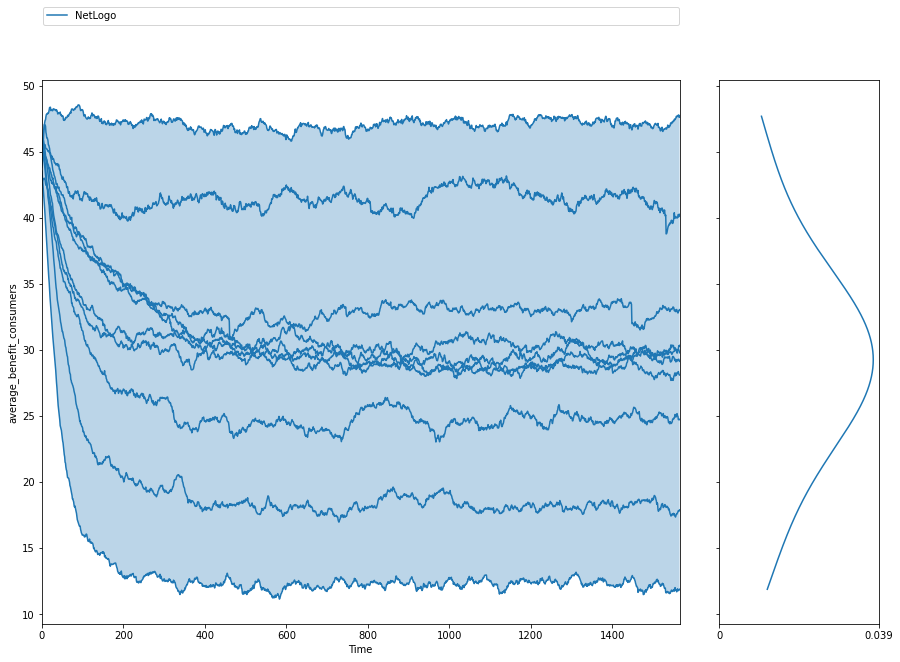

In [10]:
experiments_to_show = np.arange(0, experiments.shape[0], 1)

fig,ax=plotting.lines(experiments, outcomes_test, outcomes_to_show='average_benefit_consumers', 
       group_by='model', show_envelope=True, density=plotting.Density.KDE, 
       titles=None, experiments_to_show=experiments_to_show)

fig.set_figheight(10)
fig.set_figwidth(15)
plt.show()